In [2]:
from fastai.vision.all import *
from pathlib import Path
from fastai.vision.all import vision_learner
from fastai.callback.tracker import EarlyStoppingCallback

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

In [3]:
path = Path()
path = Path('../ImageScraping/allShoesTraining')

In [4]:
data= ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2,
                                   item_tfms=Resize(224), batch_tfms=aug_transforms(),
                                   bs=64, num_workers=0)

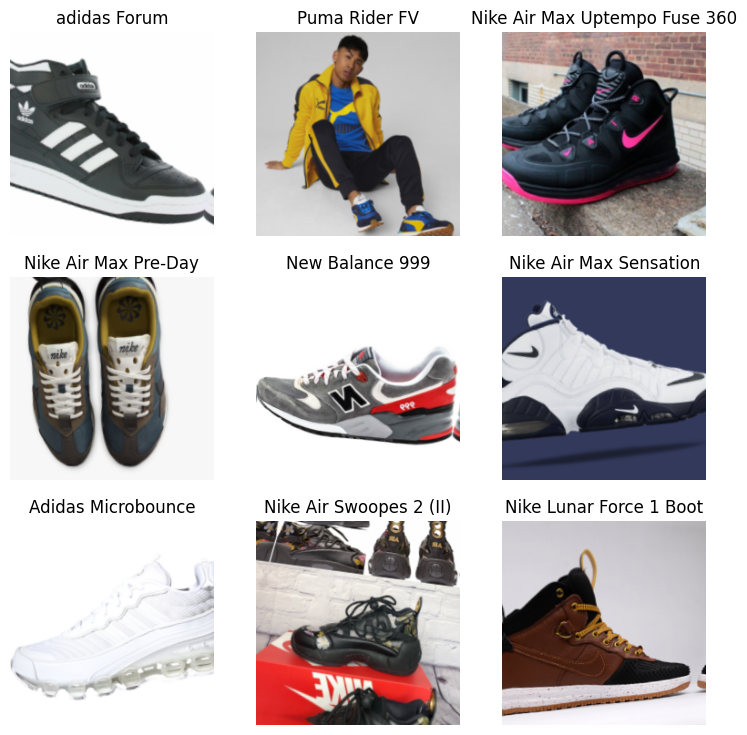

In [12]:
batch = data.show_batch()


In [13]:
early_stop_cb = EarlyStoppingCallback(monitor='valid_loss', min_delta=0.1, patience=2)
progress_cb = ProgressCallback()
 
learn = vision_learner(data, resnet34, metrics=[accuracy,
               Precision(average='macro')],
                cbs=[early_stop_cb])



In [17]:
#learn.fit_one_cycle(5, 0.01, cbs=[EarlyStoppingCallback(patience=4)])

learn.fit_one_cycle(10)
#learn.fine_tune(epochs=10)

epoch,train_loss,valid_loss,accuracy,precision_score,time
0,7.754520,6.611246,0.034431,0.022515,31:28
1,5.089177,4.184682,0.287283,0.329563,31:28
2,3.770390,2.938283,0.462218,0.519143,30:15
3,3.118339,2.474007,0.536570,0.579459,30:50
4,2.837412,2.239825,0.572427,0.605378,30:52
5,2.515466,2.076500,0.598303,0.623864,30:51
6,2.293300,1.996559,0.615483,0.628883,30:41
7,2.153512,1.932784,0.626960,0.635843,30:42
8,2.036421,1.906397,0.631665,0.639828,30:50
9,1.977467,1.901175,0.632663,0.640423,31:36


In [18]:
learn.export('./allshoes_model.pkl')


In [5]:
learn = load_learner('../ImageScraping/allShoesTraining/allshoes_model.pkl')
pred_class,pred_idx,probs = learn.predict('./dunk.jpg')
print(f"Prediction: {pred_class}; Probability: {probs[pred_idx]:.04f}")

Prediction: Nike SB Dunk Low; Probability: 0.1574


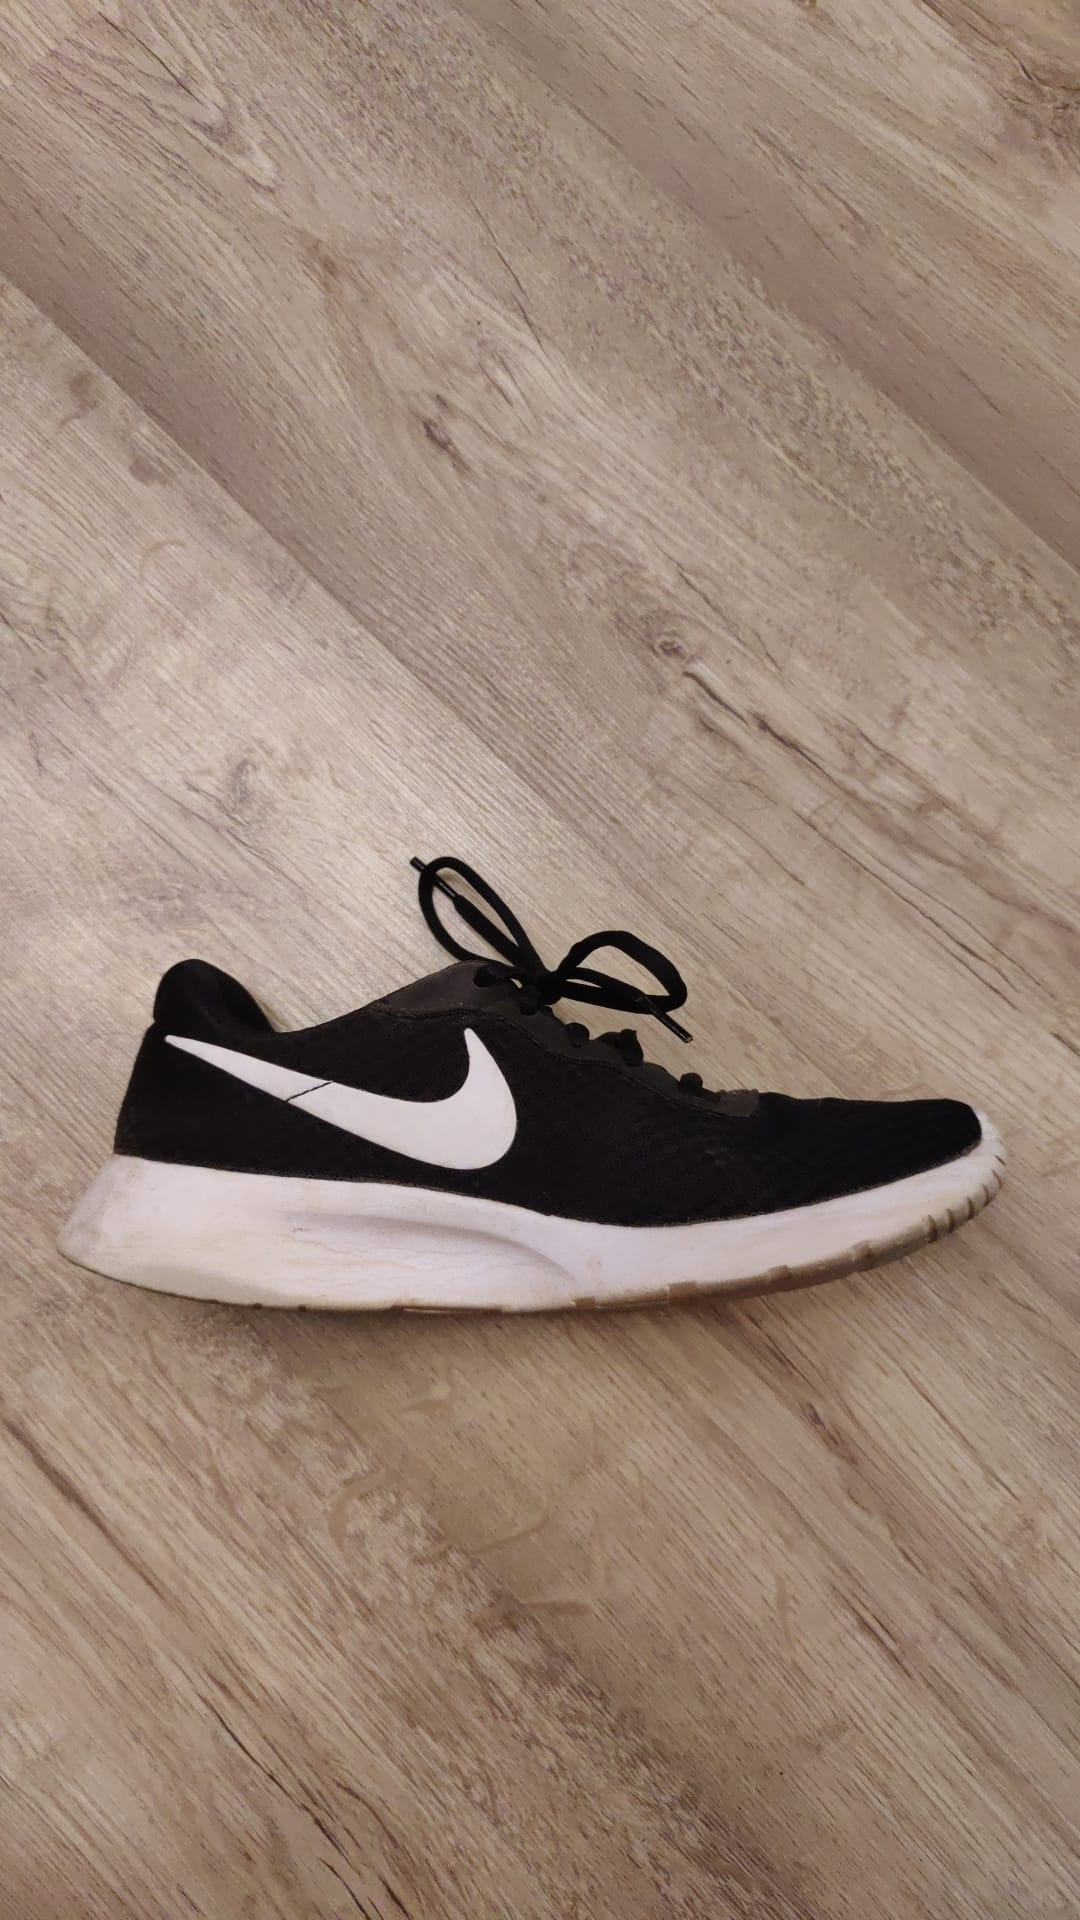

'Nike LeBron 15 (XV) Low'

'Probability: 0.1479'

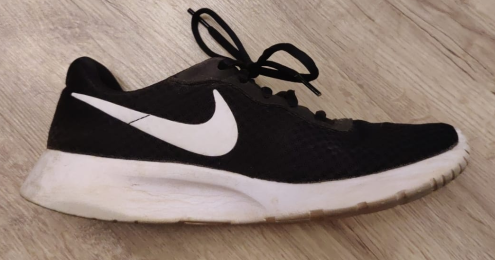

'Nike Hyperchase'

'Probability: 0.1051'

In [28]:

import ipyplot
import os
resultList = []


for filename in os.listdir("./images"):
    f = os.path.join("./images", filename)
    
    img = Image(f,width=244)
    
    pred, pred_idx, probs = learn.predict(f)
    probString = f"Probability: {probs[pred_idx]:.04f}"
    resultList.append((img,pred,probString))
for result in resultList:
    display(result[0])
    display(result[1])
    display(result[2])
    